# Buffer with the use of k-nearest neighbor algorithm
This notebook take as input a grid data and increases the number of observations of a given feature using a buffer. 
The buffer set new interpolated observations by using k-nearest neighbor to detected the closest cells to no-nullable values of the given variable.

old size    new size
28          173


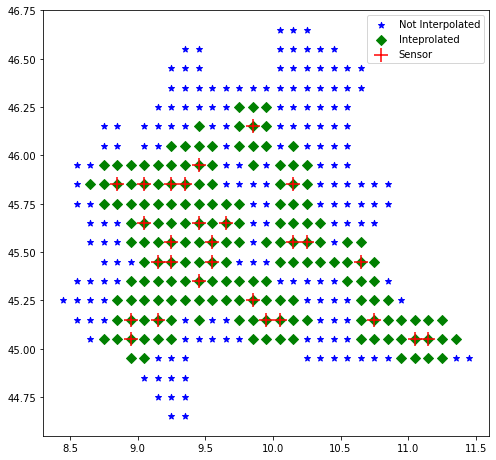

In [4]:
import geopandas as gpd
from fs import methods as m
import warnings
warnings.filterwarnings("ignore")
import os
from shapely.geometry import Point
import matplotlib.pyplot as plt

#parameter about sensor and resolution choosen
RESOLUTION = '0_1'
SENSOR = 'pm25_st'
geopackages = os.listdir('assets/grids_'+RESOLUTION)

print('old size    new size')

#data acquisition
data = gpd.read_file('assets/grids_'+RESOLUTION+'/'+ geopackages[0])
#data cleaning
points_st = data[~data['pm25_st'].isnull()]
data_filtered = data[data['pm25_st'].isnull()]

#add buffer increase the number of observation in the sensor variable
if(RESOLUTION == '0_1'):
    results = m.add_buffer(points_st, data, data, 10, SENSOR) 
else:
    results = m.add_buffer(points_st, data, data, 30, SENSOR)
   
results = results[~results['pm25_st'].isnull()].dropna(axis=1)

#data visualisation
centr_filtered = data_filtered[['lng_cen','lat_cen']]
geometry_filtered = [Point(xy) for xy in zip(data_filtered['lng_cen'], data_filtered['lat_cen'])]
cent_filtered_df = gpd.GeoDataFrame(centr_filtered,
                          crs = "EPSG:4326",
                          geometry = geometry_filtered)
fig, ax = plt.subplots(figsize=(8, 8))
cent_filtered_df.plot(ax=ax, marker='*', color='blue', markersize=40, legend=True, 
                          label= "Not Interpolated")
centr_st = points_st[['lng_cen','lat_cen']]
geometry_st = [Point(xy) for xy in zip(centr_st['lng_cen'], centr_st['lat_cen'])]
cent_st_df = gpd.GeoDataFrame(centr_st,
                          crs = "EPSG:4326",
                          geometry = geometry_st)

print(points_st.shape[0], '        ',results.shape[0])

centr_results = results[['lng_cen','lat_cen']]
geometry_results = [Point(xy) for xy in zip(results['lng_cen'], results['lat_cen'])]
results_df = gpd.GeoDataFrame(centr_results,
                          crs = "EPSG:4326",
                          geometry = geometry_results)
results_df.plot(ax=ax, marker='D', color='green', markersize=50, legend=True, 
                label = "Inteprolated");

cent_st_df.plot(ax=ax, marker='+', color='red', markersize=190, legend=True, 
                label = "Sensor");
ax.legend()





### 